<a href="https://colab.research.google.com/github/cgjeong23/Deep-Learning-Models/blob/main/Basic_DNN_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Basic NN model using MNIST Dataset

In [ ]:
import numpy as np ## importing modules
from tensorflow.keras.datasets import mnist
import torch
import matplotlib.pyplot as plt

In [ ]:
(trainX, trainy), (testX, testy) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
trainX.shape, trainy.shape, testX.shape, testy.shape 

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

5

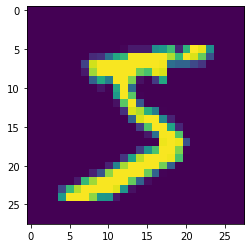

In [ ]:
plt.imshow(trainX[0]) ## How the data looks
trainy[0]

In [ ]:
trainX = trainX.reshape((60000,28*28)) ##flattening
testX = testX.reshape((10000,28*28))
#(train.shape[0], -1)

In [ ]:
trainX = trainX.astype(np.float32)
testX = testX.astype(np.float32)

trainX /= 255.0
testX /= 255.0

Building PyTorch DataLoader

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
class MNISTDataset(Dataset):
  def __init__(self, trainX, trainY):
    self.trainX = trainX
    self.trainy = trainy

  def __len__(self):
    return self.trainX.shape[0]

  def __getitem__(self, idx):
    x = self.trainX[idx]
    y = self.trainy[idx]
    return x, y


In [ ]:
dataset = MNISTDataset(trainX, trainy)

In [ ]:
x,y = dataset[0]
x.shape, y.shape

((784,), ())

In [ ]:
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
x,y = next(iter(train_loader))
x.shape, y.shape

(torch.Size([32, 784]), torch.Size([32]))

Building the model

In [ ]:
from torch import nn

In [ ]:
class FirstModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.w = np.random.rand(100)
    self.ff1 = nn.Linear(784, 10)

  def forward(self, x):
    out = self.ff1(x)
    return out

In [ ]:
model = FirstModel().to('cuda')

In [ ]:
x,y = next(iter(train_loader))
x = x.to('cuda')
h = model(x)
h.shape

torch.Size([32, 10])

Loss function

In [ ]:
loss = nn.CrossEntropyLoss()

Training

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def train(model, dataloader, loss_function, lr, epoch):

  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  
  history = []
  for e in range(epoch):

    pbar = tqdm(dataloader)
    
    for mini_batch in pbar:
      x, y = mini_batch
      x = x.to('cuda')
      y = y.to('cuda')
      h = model(x)
      j = loss_function(h,y)

      # do grad descent
      optimizer.zero_grad()
      j.backward()
      optimizer.step()

      #pbar.set_postfix({f"loss" : {j.data}})

    acc = accuracy(model, testX, testy)
    history.append(acc)
  
  return history


In [ ]:
model = FirstModel().to('cuda')
hist = train(model, train_loader, loss, 1e-3, 8)

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

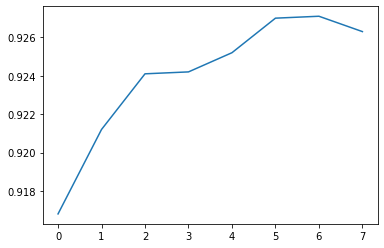

In [ ]:
import matplotlib.pyplot as plt ## visualizing accuracy

plt.plot(hist)

Accuracy function

In [ ]:
def accuracy(model, testX, testy):
  testX = torch.FloatTensor(testX).to('cuda')
  out = model(testX).cpu()
  pred = out.argmax(-1) # shape of (10000,)
  pred = pred.numpy()
  
  acc = (pred == testy).sum() / pred.shape[0] #array of (10000) boolean

  return acc



In [ ]:
accuracy(model, testX, testy)

0.9258

## Second Model

In [ ]:
class SecondModel(nn.Module):
  def __init__(self, in_dim=784, hidden_dim=512, out_dim=10):
    super().__init__()
    self.layer1 = nn.Linear(in_dim, hidden_dim)
    self.act1 = nn.ReLU()

    self.layer2 = nn.Linear(hidden_dim, hidden_dim)
    self.act2 = nn.ReLU()

    self.layer3 = nn.Linear(hidden_dim,out_dim)

  def forward(self,x):
    hidden1 = self.act1(self.layer1(x))
    hidden2 = self.act2(self.layer2(hidden1))
    out = self.layer3(hidden2)

    return out
  

In [ ]:
model = SecondModel(hidden_dim=256).to('cuda')
train(model, train_loader, loss, 1e-4, 25)

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

In [ ]:
accuracy(model, testX, testy)

0.9791

## Third Model

In [ ]:
class ThirdModel(nn.Module):
  def __init__(self, in_dim=784, hidden_dim=512, out_dim=10, dropout_p=0.1):
    super().__init__()
    self.layer1 = nn.Linear(in_dim, hidden_dim)
    self.act1 = nn.ReLU()
    self.drop1 = nn.Dropout(dropout_p)

    self.layer2 = nn.Linear(hidden_dim, hidden_dim)
    self.act2 = nn.ReLU()
    self.drop2 = nn.Dropout(dropout_p)

    self.layer3 = nn.Linear(hidden_dim,out_dim)

  def forward(self,x):
    hidden1 = self.drop1(self.act1(self.layer1(x)))
    hidden2 = self.drop2(self.act2(self.layer2(hidden1)))
    out = self.layer3(hidden2)

    return out
  

### Hyperparameters

In [ ]:
learning_rate = 1e-4
training_epochs = 15
batch_size = 100
hidden_dim = 64
dropout_p = 0.1

In [ ]:
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
model = ThirdModel(hidden_dim=256).to('cuda')
train(model, train_loader, loss, learning_rate, training_epochs)

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

[0.901,
 0.9215,
 0.9303,
 0.9403,
 0.9459,
 0.9499,
 0.9533,
 0.9594,
 0.9622,
 0.9647,
 0.9671,
 0.9685,
 0.9683,
 0.9712,
 0.9703]

0.9727

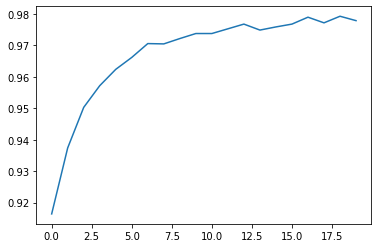

In [ ]:
import matplotlib.pyplot as plt

plt.plot([0.9164,0.9374,0.9503,0.9572,0.9624,0.9662,0.9706,0.9705,0.9722,0.9738,0.9738,0.9753,0.9768,0.9749,0.9759,0.9768,0.979,0.9772,0.9793,0.9779])
accuracy(model, testX, testy)